In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

Ch10, P.12

In [2]:
mydata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3600/market.dat",delim_whitespace=True)
x=mydata.iloc[:,2].to_numpy()
n=x.shape[0]
x=np.c_[np.ones(n),x]
p=x.shape[1]
y=mydata.iloc[:,1].to_numpy()

In [3]:
ixtx=np.linalg.inv(x.T @ x)
beta=ixtx @ x.T @ y
print(beta)
yhat=x @ beta
res=y-yhat
sse=np.sum(res**2)
sst=sum((y-y.mean())**2)
rsq=1-sse/sst
print(rsq)

[0.84801005 0.61032943]
0.2590100215889807


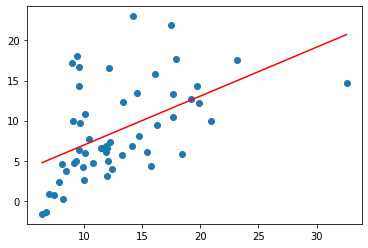

In [4]:
xsorted=np.sort(x[:,1])
plt.plot(x[:,1],y,linewidth=0,marker='o')
plt.plot(xsorted, beta[0]+beta[1]*xsorted, color='red')
plt.show()

4.990637560963132


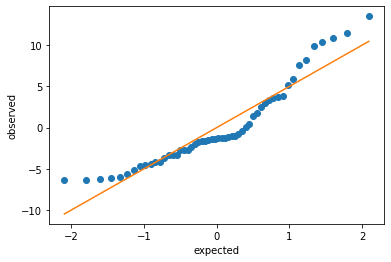

In [5]:
rsorted=np.sort(res)
exp_q=stats.norm().ppf(np.linspace(1,n,n)/(n+1))
sdr=np.std(res)
print(sdr)
rx0=[min(exp_q),max(exp_q)]
ry0=[min(exp_q)*sdr,max(exp_q)*sdr]
plt.plot(exp_q,rsorted,marker='o',linewidth=0)
plt.plot(rx0, ry0, linestyle = '-')
plt.xlabel('expected')
plt.ylabel('observed')
plt.show()